In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parseTiming(fname):
    with open(fname, 'r') as f:
        for line in f:
            if "diverged" in line: raise Exception(f"iterations in file {fname} diverged!")
            if "Braid" in line: continue
            if "wall time" in line: return float(line.split()[-1])
    raise Exception("Reached end of file!")

def parseIters(fname):
    with open(fname, 'r') as f:
        for line in f:
            if "max iterations" in line: continue
            if "Max" in line: continue
            if "iterations" in line: return float(line.split()[-1])

In [16]:
ncores = (8, 32, 128, 512)
mlevels = (2, 3, 4, 4)
serials = np.zeros(len(ncores))
thetas = np.zeros(len(ncores))
deltas = np.zeros(len(ncores))
mgrits = np.zeros(len(ncores)-1)

for i, (nc, ml) in enumerate(zip(ncores, mlevels)):
    serials[i] = parseTiming(f"ks_nc{nc}_ml1")
    thetas[i] = parseTiming(f"ks_theta_nc{nc}_ml{ml}")
    deltas[i] = parseTiming(f"ks_Delta_nc{nc}_ml{ml}")

for i, (nc, ml) in enumerate(zip(ncores[1:], mlevels[1:])):
    mgrits[i] = parseTiming(f"ks_nc{nc}_ml{ml}")

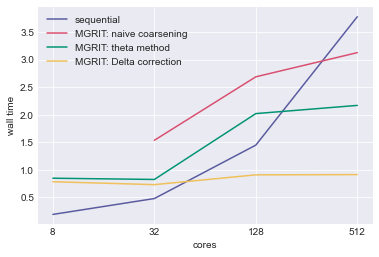

In [23]:
plt.semilogx(ncores, serials, label="sequential")
plt.semilogx(ncores[1:], mgrits, label="MGRIT: naive coarsening")
plt.semilogx(ncores, thetas, label="MGRIT: theta method")
plt.semilogx(ncores, deltas, label="MGRIT: Delta correction")
plt.xticks(ncores, ncores)
plt.xlabel("cores")
plt.ylabel("wall time")
plt.legend()